# EDA for sequence data

- 타겟변수는 탈선계수 20개(파일별로 4개씩 있음)
- 우선 data_s100에 대해 eda를 수행. 다만 lane_data_c 정보도 같이 활용하는 거 같ㅇ,ㄴ...

- 3km의 데이터가 주어지며, 나머지 500m를 예측하는 모델. 일반적인 ML 방식은 허용되지 않고, 시계열 모델을 써야만 함
- lane_data_s.csv은 곡선 구간에 대한 선로 데이터, data_s100.csv는 주행 데이터

<!-- 데이터
- data_c100, ... : 비선형제어능력(숫자)에 따른 곡선구간 및 직선구간 데이터
- lane_data_c: 4개의 컬럼
- lane_data_s: 6개의 컬럼
- 모두 12000 로우를 가짐

메타?
- data_columns: 컬럼명이 설명되어 있음
- lane_data_columns: cp949로 열어야 함. lane 데이터에 대한 컬럼명 적혀있음.
- answer_sample: (1999, 41) shape
- 차량_및_요댐퍼: 뭔 데이터인지 모르겠음 뷰어로 열어서 봐야할듯. -->

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

### metric - weighted MAPE

In [133]:
from sklearn.metrics import mean_absolute_percentage_error

def weighted_mape(y_true, y_test):
    w = np.array([1+0.0001*(i+1) for i in range(y_true.shape[0])])
    return mean_absolute_percentage_error(
        y_true, y_test, sample_weight=w)

# example
a = np.array([1,2,3,4])
b = np.array([1,1,3,3])
weighted_mape(a, b)

0.18750312421894524

### `data_s100.csv`

In [3]:
df_lane = pd.read_csv("data/lane_data_s.csv")
print(df_lane.shape)
df_lane.head()

# df = pd.read_csv("data/lane_data_columns.csv", encoding='cp949')
# df

(12000, 6)


,Distance,Cross level,Curvature,Lateral,Vertical,Gauge
0,0.00,0.081,0.002,1.308,1.155,0.345
1,0.25,0.251,0.002,1.282,1.157,0.151
2,0.50,0.421,0.002,1.256,1.159,-0.043
3,0.75,0.416,0.002,1.297,0.858,0.033
4,1.00,0.412,0.002,1.337,0.558,0.110


In [4]:
df_s100 = pd.read_csv("data/data_s100.csv", index_col='Distance')
print(df_s100.shape)
df_s100.tail()

(12000, 34)


,A_M1_C_B1_Y,A_M1_C_B1_Z,A_M1_B1_W1_Y_L,A_M1_B1_BC_Y_L,A_M1_B1_W2_Y_L,A_M1_B1_W1_Y_R,A_M1_B1_BC_Y_R,A_M1_B1_W2_Y_R,A_M1_B1_W1_Z_L,A_M1_B1_BC_Z_L,...,QL_M1_B1_W1,QR_M1_B1_W1,V_M1_B1_W2_L,V_M1_B1_W2_R,QL_M1_B1_W2,QR_M1_B1_W2,YL_M1_B1_W1,YR_M1_B1_W1,YL_M1_B1_W2,YR_M1_B1_W2
Distance,,,,,,,,,,,,,,,,,,,,,
2998.75,0.055240,0.087085,-1.0450,-1.3120,-1.5790,-1.0460,-1.3130,-1.5800,10.5600,5.7260,...,0.212500,0.106400,-8.669,-18.45,-0.1302,-0.2709,0.0,0.0,0.0,0.0
2999.00,0.066029,0.095299,-0.9352,-0.1845,0.5661,-0.9358,-0.1852,0.5655,6.1000,-0.7349,...,0.153200,0.053737,-7.556,-23.30,-0.1135,-0.3421,0.0,0.0,0.0,0.0
2999.25,0.073792,0.080321,-0.7125,1.1250,2.9630,-0.7121,1.1260,2.9630,0.6099,-5.8260,...,0.098914,0.149600,-10.400,-30.81,-0.1563,-0.4525,0.0,0.0,0.0,0.0
2999.50,0.079806,0.042560,-0.9098,1.4760,3.8630,-0.9087,1.4780,3.8640,-0.7067,-5.8840,...,0.001466,0.151300,-16.030,-34.93,-0.2408,-0.5130,0.0,0.0,0.0,0.0
2999.75,0.084201,-0.006741,-1.3680,0.9582,3.2850,-1.3680,0.9588,3.2850,1.8480,-2.7210,...,-0.068780,0.268100,-17.370,-24.86,-0.2610,-0.3652,0.0,0.0,0.0,0.0


In [5]:
# df_s100.loc[:100, ['YL_M1_B1_W1', 'YR_M1_B1_W1', 'YL_M1_B1_W2', 
#     'YR_M1_B1_W2']].plot(subplots=True)
# plt.show()

- 가까이서 보니, 좌우 바퀴의 탈선 계수는 대칭의 형태를 띄는 편

In [6]:
# df_s100[['YL_M1_B1_W1', 'YR_M1_B1_W1', 'YL_M1_B1_W2', 'YR_M1_B1_W2']].plot(subplots=True, kind='hist')
# plt.show()

우선 다른 변수를 고려하지 말고 ARIMA를 해보자

In [7]:
df_s100[:2700]

,A_M1_C_B1_Y,A_M1_C_B1_Z,A_M1_B1_W1_Y_L,A_M1_B1_BC_Y_L,A_M1_B1_W2_Y_L,A_M1_B1_W1_Y_R,A_M1_B1_BC_Y_R,A_M1_B1_W2_Y_R,A_M1_B1_W1_Z_L,A_M1_B1_BC_Z_L,...,QL_M1_B1_W1,QR_M1_B1_W1,V_M1_B1_W2_L,V_M1_B1_W2_R,QL_M1_B1_W2,QR_M1_B1_W2,YL_M1_B1_W1,YR_M1_B1_W1,YL_M1_B1_W2,YR_M1_B1_W2
Distance,,,,,,,,,,,,,,,,,,,,,
0.00,-1.273400e-09,-1.943500e-08,0.022194,0.022194,0.022194,0.022194,0.022194,0.022194,-0.055737,-0.055737,...,-0.305900,0.354800,0.000832,0.000847,0.000012,0.000012,0.001366,0.001558,0.001412,0.001406
0.25,1.485600e-05,3.403000e-06,0.161500,0.159800,0.158200,0.161500,0.159800,0.158200,-0.369500,-0.384500,...,-0.086214,0.088455,-0.010882,0.012985,-0.000163,0.000191,0.007337,-0.004638,0.001448,0.001525
0.50,2.706500e-04,5.112900e-05,0.579500,0.569500,0.559500,0.579500,0.569500,0.559500,-1.329000,-1.366000,...,-0.085584,0.082844,-0.008447,0.010115,-0.000127,0.000149,0.011998,-0.009334,0.001715,0.001607
0.75,1.247900e-03,1.295900e-04,0.812000,0.789500,0.767100,0.811800,0.789300,0.766900,-2.511000,-2.166000,...,-0.249400,-0.187700,0.153500,-0.153900,0.002307,-0.002261,0.008566,-0.005116,0.002410,0.001200
1.00,3.080900e-03,-1.466900e-03,0.383100,0.349700,0.316300,0.382700,0.349300,0.315900,-5.545000,-2.892000,...,-0.289500,-0.268300,0.630800,-0.630400,0.009477,-0.009258,0.002605,0.001091,0.003430,0.000351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699.00,1.195000e-01,-9.130300e-02,3.777000,1.133000,-1.510000,3.777000,1.134000,-1.510000,-0.001762,0.467500,...,0.163700,0.002108,-6.417000,-3.690000,-0.096406,-0.054191,0.000000,0.000000,0.000000,0.000000
2699.25,1.668000e-01,-8.556800e-02,2.958000,0.780200,-1.398000,2.958000,0.779600,-1.398000,4.802000,1.280000,...,0.169300,-0.024705,-15.090000,-1.147000,-0.226700,-0.016838,0.000000,0.000000,0.000000,0.000000
2699.50,2.116000e-01,-9.061800e-02,1.895000,0.597000,-0.700600,1.893000,0.595400,-0.702200,7.865000,1.409000,...,0.146400,-0.019047,-23.530000,2.157000,-0.353500,0.031678,0.000000,0.000000,0.000000,0.000000


In [16]:
df_target = df_s100.loc[:2500, ['YL_M1_B1_W1']]

In [14]:
# fig = plt.figure(figsize=(12,5))
# ax = fig.add_subplot()

# ax.plot(df_target, label='Original')
# ax.plot(df_target.rolling(6).mean(), label='rolling_mean')
# ax.plot(df_target.rolling(6).std(), label='rolling_std')
# plt.show()

In [17]:
# adfuller library 
from statsmodels.tsa.stattools import adfuller
# check_adfuller
# Dickey-Fuller test
result = adfuller(df_target, autolag='AIC')
print('Test statistic: ' , result[0])
print('p-value: '  ,result[1])
print('Critical Values:' ,result[4])


Test statistic:  -21.69690187167506
p-value:  0.0
Critical Values: {'1%': -3.4310065936361585, '5%': -2.861830175207641, '10%': -2.5669244551266304}


정상 시계열임

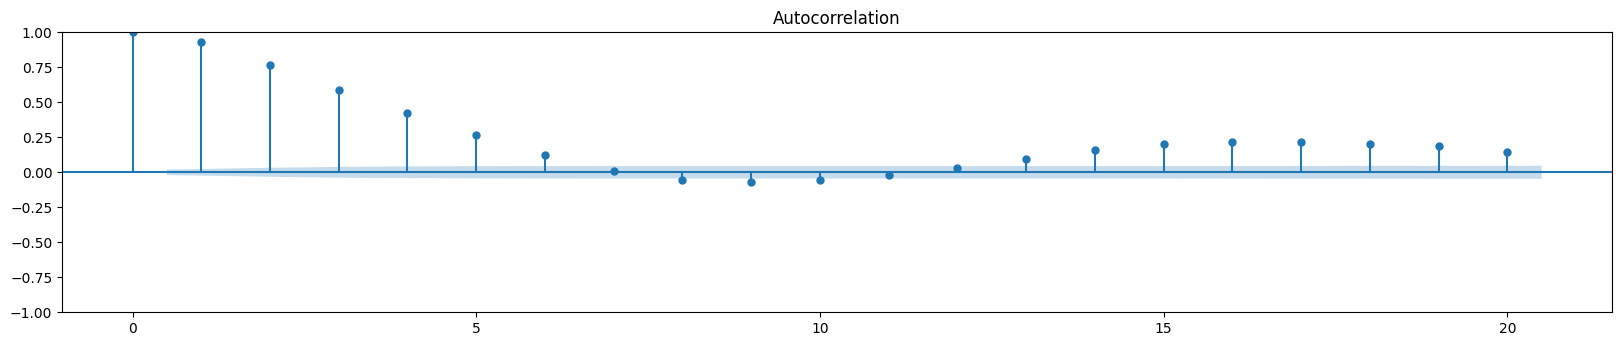

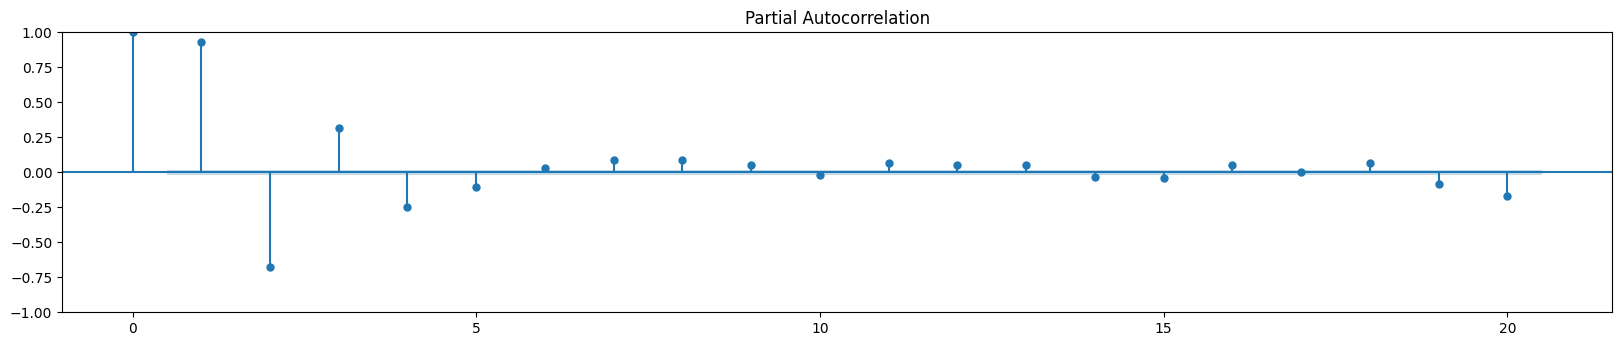

In [20]:
import statsmodels.api as sm
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_target, lags=20, ax=ax1)

fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_target, lags=20, ax=ax1)

In [ ]:
ACF - q=7
PACF - p=2

In [23]:
from statsmodels.tsa.ar_model import AutoReg
ar_model = AutoReg(df_target, lags = 1).fit()

print(ar_model.summary())

                            AutoReg Model Results                             
Dep. Variable:            YL_M1_B1_W1   No. Observations:                10001
Model:                     AutoReg(1)   Log Likelihood               36634.362
Method:               Conditional MLE   S.D. of innovations              0.006
Date:                Fri, 04 Aug 2023   AIC                         -73262.724
Time:                        11:02:46   BIC                         -73241.093
Sample:                             1   HQIC                        -73255.402
                                10001                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0003   6.46e-05      5.379      0.000       0.000       0.000
YL_M1_B1_W1.L1     0.9274      0.004    247.982      0.000       0.920       0.935
                                    

/home/leejuyeon/.conda/envs/track/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [29]:
ar_model = AutoReg(df_target, lags=2).fit()

print(ar_model.summary())

                            AutoReg Model Results                             
Dep. Variable:            YL_M1_B1_W1   No. Observations:                10001
Model:                     AutoReg(2)   Log Likelihood               39649.191
Method:               Conditional MLE   S.D. of innovations              0.005
Date:                Fri, 04 Aug 2023   AIC                         -79290.383
Time:                        11:05:11   BIC                         -79261.542
Sample:                             2   HQIC                        -79280.620
                                10001                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0006   4.78e-05     12.125      0.000       0.000       0.001
YL_M1_B1_W1.L1     1.5518      0.007    209.862      0.000       1.537       1.566
YL_M1_B1_W1.L2    -0.6732      0.007

/home/leejuyeon/.conda/envs/track/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [46]:
from statsmodels.tsa.arima.model import ARIMA
ma_model = ARIMA(df_target, order = (2, 0, 1)).fit()
ma_model.summary()

/home/leejuyeon/.conda/envs/track/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/leejuyeon/.conda/envs/track/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/leejuyeon/.conda/envs/track/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            YL_M1_B1_W1   No. Observations:                10001
Model:                 ARIMA(2, 0, 1)   Log Likelihood               40340.123
Date:                Fri, 04 Aug 2023   AIC                         -80670.245
Time:                        11:14:36   BIC                         -80634.193
Sample:                             0   HQIC                        -80658.042
                              - 10001                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0048      0.001      9.332      0.000       0.004       0.006
ar.L1          1.3283      0.004    369.314      0.000       1.321       1.335
ar.L2         -0.4700      0.004   -111.945      0.000      -0.478      -0.462
ma.L1          0.4811      0.003    150.915      0.000       0.475       0.487
sigma2      1.833e-05   5.41e-08    338.980      0.000    1.82e-05    1.84e-05
===================================================================================
Ljung-Box (L1) (Q):                   4.41   Jarque-Bera (JB):           8542135.68
Prob(Q):                              0.04   Prob(JB):                         0.00
Heteroskedasticity (H):               2.29   Skew:                             1.22
Prob(H) (two-sided):                  0.00   Kurtosis:                       146.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [139]:
df_train = df_target.iloc[:9000, :]#.reset_index(drop=True)
df_test = df_target.iloc[9000:, :]#.reset_index(drop=True)
#df_test.index = df_test.index+8000

df_train.shape, df_test.shape

((9000, 1), (1001, 1))

In [140]:
from statsmodels.tsa.arima.model import ARIMA
arima_model = ARIMA(df_train, order = (2, 0, 1)).fit()
arima_model.summary()

/home/leejuyeon/.conda/envs/track/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/leejuyeon/.conda/envs/track/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/leejuyeon/.conda/envs/track/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            YL_M1_B1_W1   No. Observations:                 9000
Model:                 ARIMA(2, 0, 1)   Log Likelihood               36130.960
Date:                Fri, 04 Aug 2023   AIC                         -72251.919
Time:                        11:54:35   BIC                         -72216.395
Sample:                             0   HQIC                        -72239.831
                               - 9000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0048      0.001      8.760      0.000       0.004       0.006
ar.L1          1.3190      0.004    345.366      0.000       1.312       1.327
ar.L2         -0.4628      0.004   -103.729      0.000      -0.472      -0.454
ma.L1          0.4761      0.003    138.680      0.000       0.469       0.483
sigma2      1.903e-05    5.9e-08    322.425      0.000    1.89e-05    1.91e-05
===================================================================================
Ljung-Box (L1) (Q):                   3.48   Jarque-Bera (JB):           7680215.31
Prob(Q):                              0.06   Prob(JB):                         0.00
Heteroskedasticity (H):               2.42   Skew:                             1.20
Prob(H) (two-sided):                  0.00   Kurtosis:                       146.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [142]:
forecasted = pd.DataFrame(arima_model.predict(start=2000, end=3000))
forecasted.index = df_test.index
forecasted

,predicted_mean
Distance,
2250.00,0.009344
2250.25,0.005422
2250.50,0.002783
2250.75,0.000891
2251.00,0.002701
...,...
2499.00,0.005090
2499.25,0.004221
2499.50,-0.002705


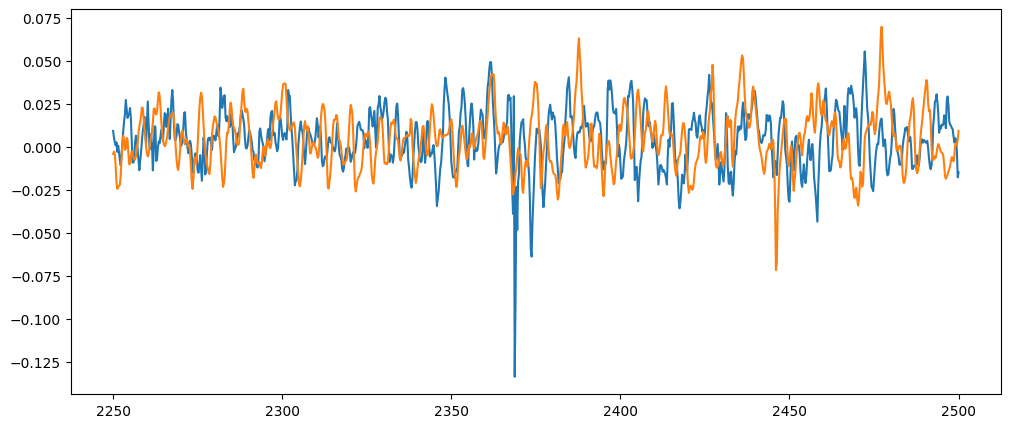

In [143]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot()
ax.plot(forecasted, label='forecasted')
ax.plot(df_test, label='real')
plt.show()

In [144]:
weighted_mape(df_test.values, forecasted.values)

4.281892583651573

In [145]:
# df_test.values, forecasted.values
mean_absolute_percentage_error(df_test.values, forecasted.values)

4.269330044043618

결과 해석을 몬하겠다.

In [155]:
df_train = df_s100.iloc[:9000,:][
    ['YL_M1_B1_W1', 'YR_M1_B1_W1', 'YL_M1_B1_W2', 'YR_M1_B1_W2']]
df_test = df_s100.iloc[9000:10000,:][
    ['YL_M1_B1_W1', 'YR_M1_B1_W1', 'YL_M1_B1_W2', 'YR_M1_B1_W2']]

df_train.shape, df_test.shape

((9000, 4), (1000, 4))

In [158]:
df_train

,YL_M1_B1_W1,YR_M1_B1_W1,YL_M1_B1_W2,YR_M1_B1_W2
Distance,,,,
0.00,0.001366,0.001558,0.001412,0.001406
0.25,0.007337,-0.004638,0.001448,0.001525
0.50,0.011998,-0.009334,0.001715,0.001607
0.75,0.008566,-0.005116,0.002410,0.001200
1.00,0.002605,0.001091,0.003430,0.000351
...,...,...,...,...
2248.75,-0.004425,0.009638,-0.022870,0.023742
2249.00,0.002848,0.001901,-0.027911,0.031154
2249.25,0.003737,0.000754,-0.030007,0.036347


In [180]:
int(df_test.index[0])

2250

In [197]:
#fit the model
from statsmodels.tsa.vector_ar.var_model import VAR

model = VAR(endog=df_train)
model_fit = model.fit()

# make prediction on validation
prediction = model.predict(params=model_fit.params, start=2250, end=3250)[:-1]
prediction = pd.DataFrame(prediction, columns=df_test.columns, 
    index=df_test.index)
# pd.DataFrame(prediction, header=

/home/leejuyeon/.conda/envs/track/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


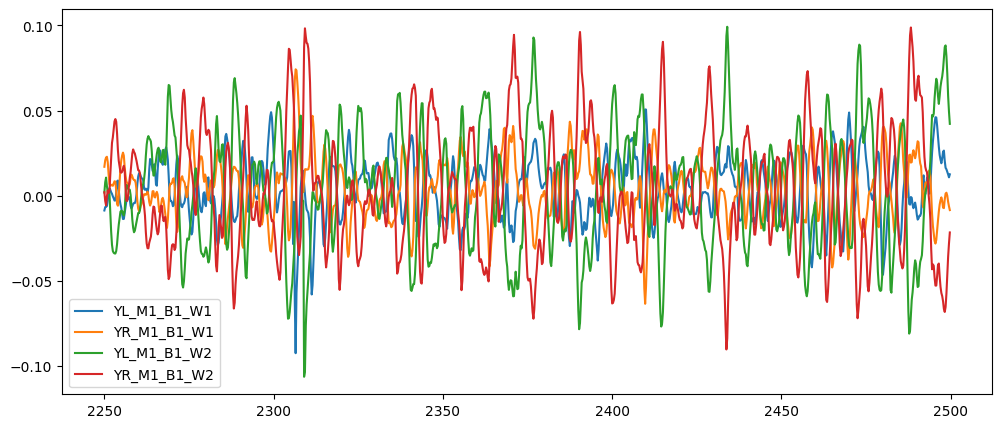

In [200]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot()
ax.plot(prediction, label=df_test.columns)
plt.legend()
plt.show()

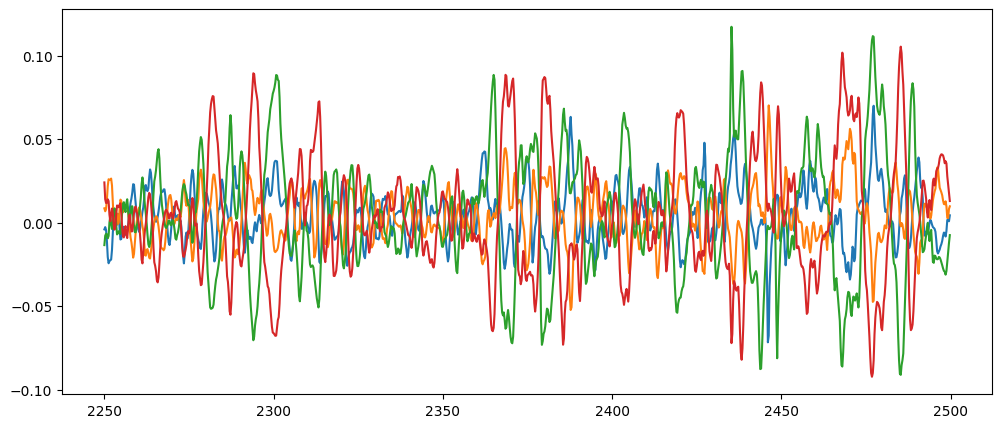

In [201]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot()
ax.plot(df_test, label=df_test.columns)
plt.show()

In [203]:
weighted_mape(df_test.values, prediction.values)

5.533895048103913

더 시도해볼 것.

- arima for multivariate
- auto arima
- 푸리에 변환